# Goal for this notebook

I want to solve the question:
  - Given a graph of n nodes with m edges
  - Each node has an initial value
  - Solve a diffusion equation on the graph
  - This is like solving the heat equation on an irregular grid.
 
What this notebook seeks to accomplish:
  - Solving the PDE of diffusion on an irregular grid.
  
What I need to do:
  1. Set up a diffusion equation that can be solved exactly on a regular grid.
    - This will be used as the base for initial and checking correct final values 
  2. Write a function to generate a random graph
    - Pick locations on the grid and creating the graph
    - Initialize the values to the initial values of that location of the initial PDE
  3. Write a variety of methods to solve the diffusion on the graph
  4. Write a function that shows the evolution of the graph
  5. Write a function that shows the accuracy of the graph.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import networkx as nx

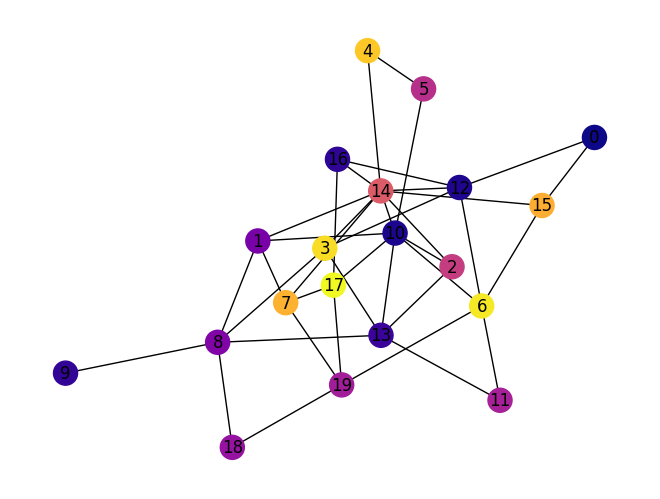

In [52]:
# Create a graph (you can create your own graph or use a built-in NetworkX graph)
num_nodes = 20
probability_of_edge = 0.2
G = nx.erdos_renyi_graph(num_nodes, probability_of_edge)
pos = nx.spring_layout(G)

# Add nodes with initial values
initial_values = {node: np.random.rand() for node in G.nodes}
nx.set_node_attributes(G, initial_values, name='value')

# Visualize the graph with colored nodes
nx.draw(G, pos=pos, with_labels=True, node_color=[G.nodes[i]['value'] for i in G.nodes], cmap=plt.cm.plasma)
plt.show()

# Define diffusion process (e.g., simple averaging)
def diffusion_step(G):
    new_values = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        num_neighbors = len(neighbors)
        neighbor_values = sum(G.nodes[n]['value'] for n in neighbors)
        new_values[node] = (G.nodes[node]['value'] + neighbor_values) / (num_neighbors + 1)
    nx.set_node_attributes(G, new_values, name='value')

# Iterate diffusion process
num_iterations = 100
for _ in range(num_iterations):
    diffusion_step(G)

# Visualize the final state of the graph
# (You can use networkx or any other library for visualization)
# nx.draw(G, with_labels=True)
# plt.show()


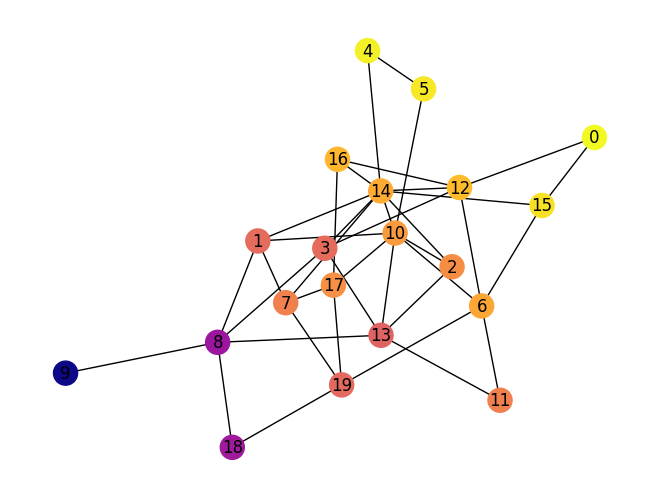

In [53]:
# Visualize the graph with colored nodes
nx.draw(G, pos=pos, with_labels=True, node_color=[G.nodes[i]['value'] for i in G.nodes], cmap=plt.cm.plasma)
plt.show()